# Credit Loan Prediction

This Notebook inspired by [Nadyana](https://www.kaggle.com/nadyana) on kaggle.

This prediction intend to evaluating whether a potential borrower will repay a loan, especially true in peer-to-peer lending, where issues related to class imbalance are widespread.

In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# Data Preparation

In [5]:
# Read and load data into dataframe
loan_data = pd.read_csv('loan_data_2007_2014.csv')
loan_data.shape

<ipython-input-5-0ef7287d6f2a>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan_data_2007_2014.csv')


(466285, 75)

This data have **466285** rows and **75** features that we have to remove whether irrelevant feature

In [7]:
# check all the features
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Data Pre-processing, Cleaning, and Feature Engineering



*   check data (missing value, etc)

Drop columns

*   Drop column 'Unnamed: 0' which is a copy of an index.
*   Drop the columns having > 50% missing values. (columns with 0 unique value are also columns that have 100% missing value)
*   Drop column 'application_type' and 'policy_code' (it only have 1 unique value).
*   Drop identifier columns: id, member_id, title, emp_title, url, zip_code, desc, policy_code (it can not be used in building model).
Drop sub_grade, it contains the same information as the grade columns.



In [8]:
# check the missing data
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

# Define Target Variable / Labeling

In [9]:
# check the value of each loan_status column, loan_status is the target data
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [10]:
# check the overall value of loan_status column
loan_data['loan_status'].count()

466285

In [11]:
# we can get the proportion of observations for each unique value of a variable from Dividing the number of observations for each unique value of a variable by the total number of observations
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Because we wanted to predict whether a loan is risky or not. Then we need to know the end of each loans historically, wether the loan was defaulted / charged off, or fully paid. Next, we will classy the loan as good loans (non risky) and bad loans (risky).

based on the data above, the loan will classify as follows: '

*   good loans = ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']
*   bad loans = ['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']




In [12]:
# define values
good_loans = ['Current', 'Fully Paid', 'In Grace Period',
              'Does not meet the credit policy. Status:Fully Paid']

# create new column to classify ending
loan_data['good_bad_loan'] = np.where(loan_data['loan_status'].isin(good_loans), 1, 0)

In [13]:
loan_data['good_bad_loan']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad_loan, Length: 466285, dtype: int64

<Axes: title={'center': 'Good (1) vs Bad (0) Loans Balance'}, xlabel='None'>

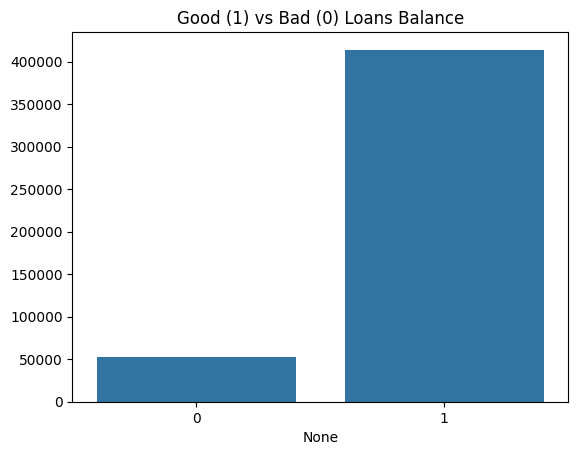

In [14]:
# check balance
plt.title('Good (1) vs Bad (0) Loans Balance')
sns.barplot(x=loan_data.good_bad_loan.value_counts().index,y=loan_data.good_bad_loan.value_counts().values)

In [15]:
# get a list of columns that have more than 50% null values
na_values = loan_data.isnull().mean()
na_values[na_values>0.5]

desc                           0.729815
mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

In [16]:
# Filtering data with less than 2 unique values
loan_data.nunique()[loan_data.nunique() < 2].sort_values()

mths_since_rcnt_il           0
inq_fi                       0
all_util                     0
max_bal_bc                   0
open_rv_24m                  0
open_rv_12m                  0
il_util                      0
total_bal_il                 0
total_cu_tl                  0
inq_last_12m                 0
open_il_12m                  0
open_il_6m                   0
open_acc_6m                  0
verification_status_joint    0
dti_joint                    0
annual_inc_joint             0
open_il_24m                  0
application_type             1
policy_code                  1
dtype: int64

In [17]:
# Drop the irrelevant columns
loan_data.drop(['Unnamed: 0', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog',
                'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                'open_il_12m', 'open_il_24m','mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
                'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'policy_code',
                'application_type','id', 'member_id', 'sub_grade', 'emp_title', 'url', 'title',
                'zip_code'], axis=1, inplace = True)

Data/column understanding is important. We wanted to predict whether a loan is risky or not, before we invest in the loan, not after. The problem with our data is in the columns related to the current status of the loan. We can only get the data of those columns after the loan is issued, in other words, after we invested in the loan.



*   Columns related to the current status of the loan (after it is issued): 'issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', next_pymnt_d

For example, 'out_prncp' (outstanding principal (Remaining outstanding principal for total amount funded)), when out_prncp is 0, then it means the loan is already fully paid, it's easy to predict based on this one variable alone, and it will be super accurate. Another example is with 'recoveries', recoveries only happened after a borrower is unable to repay a loan and the lending institution initiates a loan recovery process. Of course, we know that the loan is bad and risky, just from this info alone. Those variables can predict so accurately because it's already happened.

In data science this kind of variable is called Data Leakage. Data Leakage is the creation of unexpected additional information in the training data, allowing a model or machine learning algorithm to make unrealistically good predictions. This is the data that we won't get when we use the model in deployment. We won't know if there'll be recovery fee, or if the outstanding principal will be 0 or not before the loan is concluded. We won't get any of those data before we invest in the loan.

So, those columns that contain Data Leakage will be drop and only keep the column with data that can be obtained before the loan is invested in.

In [18]:
leakage_col = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

loan_data.drop(columns=leakage_col, axis=1, inplace=True)

In [19]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_length                  445277 non-null  object 
 8   home_ownership              466285 non-null  object 
 9   annual_inc                  466281 non-null  float64
 10  verification_status         466285 non-null  object 
 11  purpose                     466285 non-null  object 
 12  addr_state                  466285 non-null  object 
 13  dti           

We have to check the similiar correlation, so we can know which the irrelevant columns

<ipython-input-20-bcd01c826716>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data.corr(), annot=True, annot_kws={'size':14})


<Axes: >

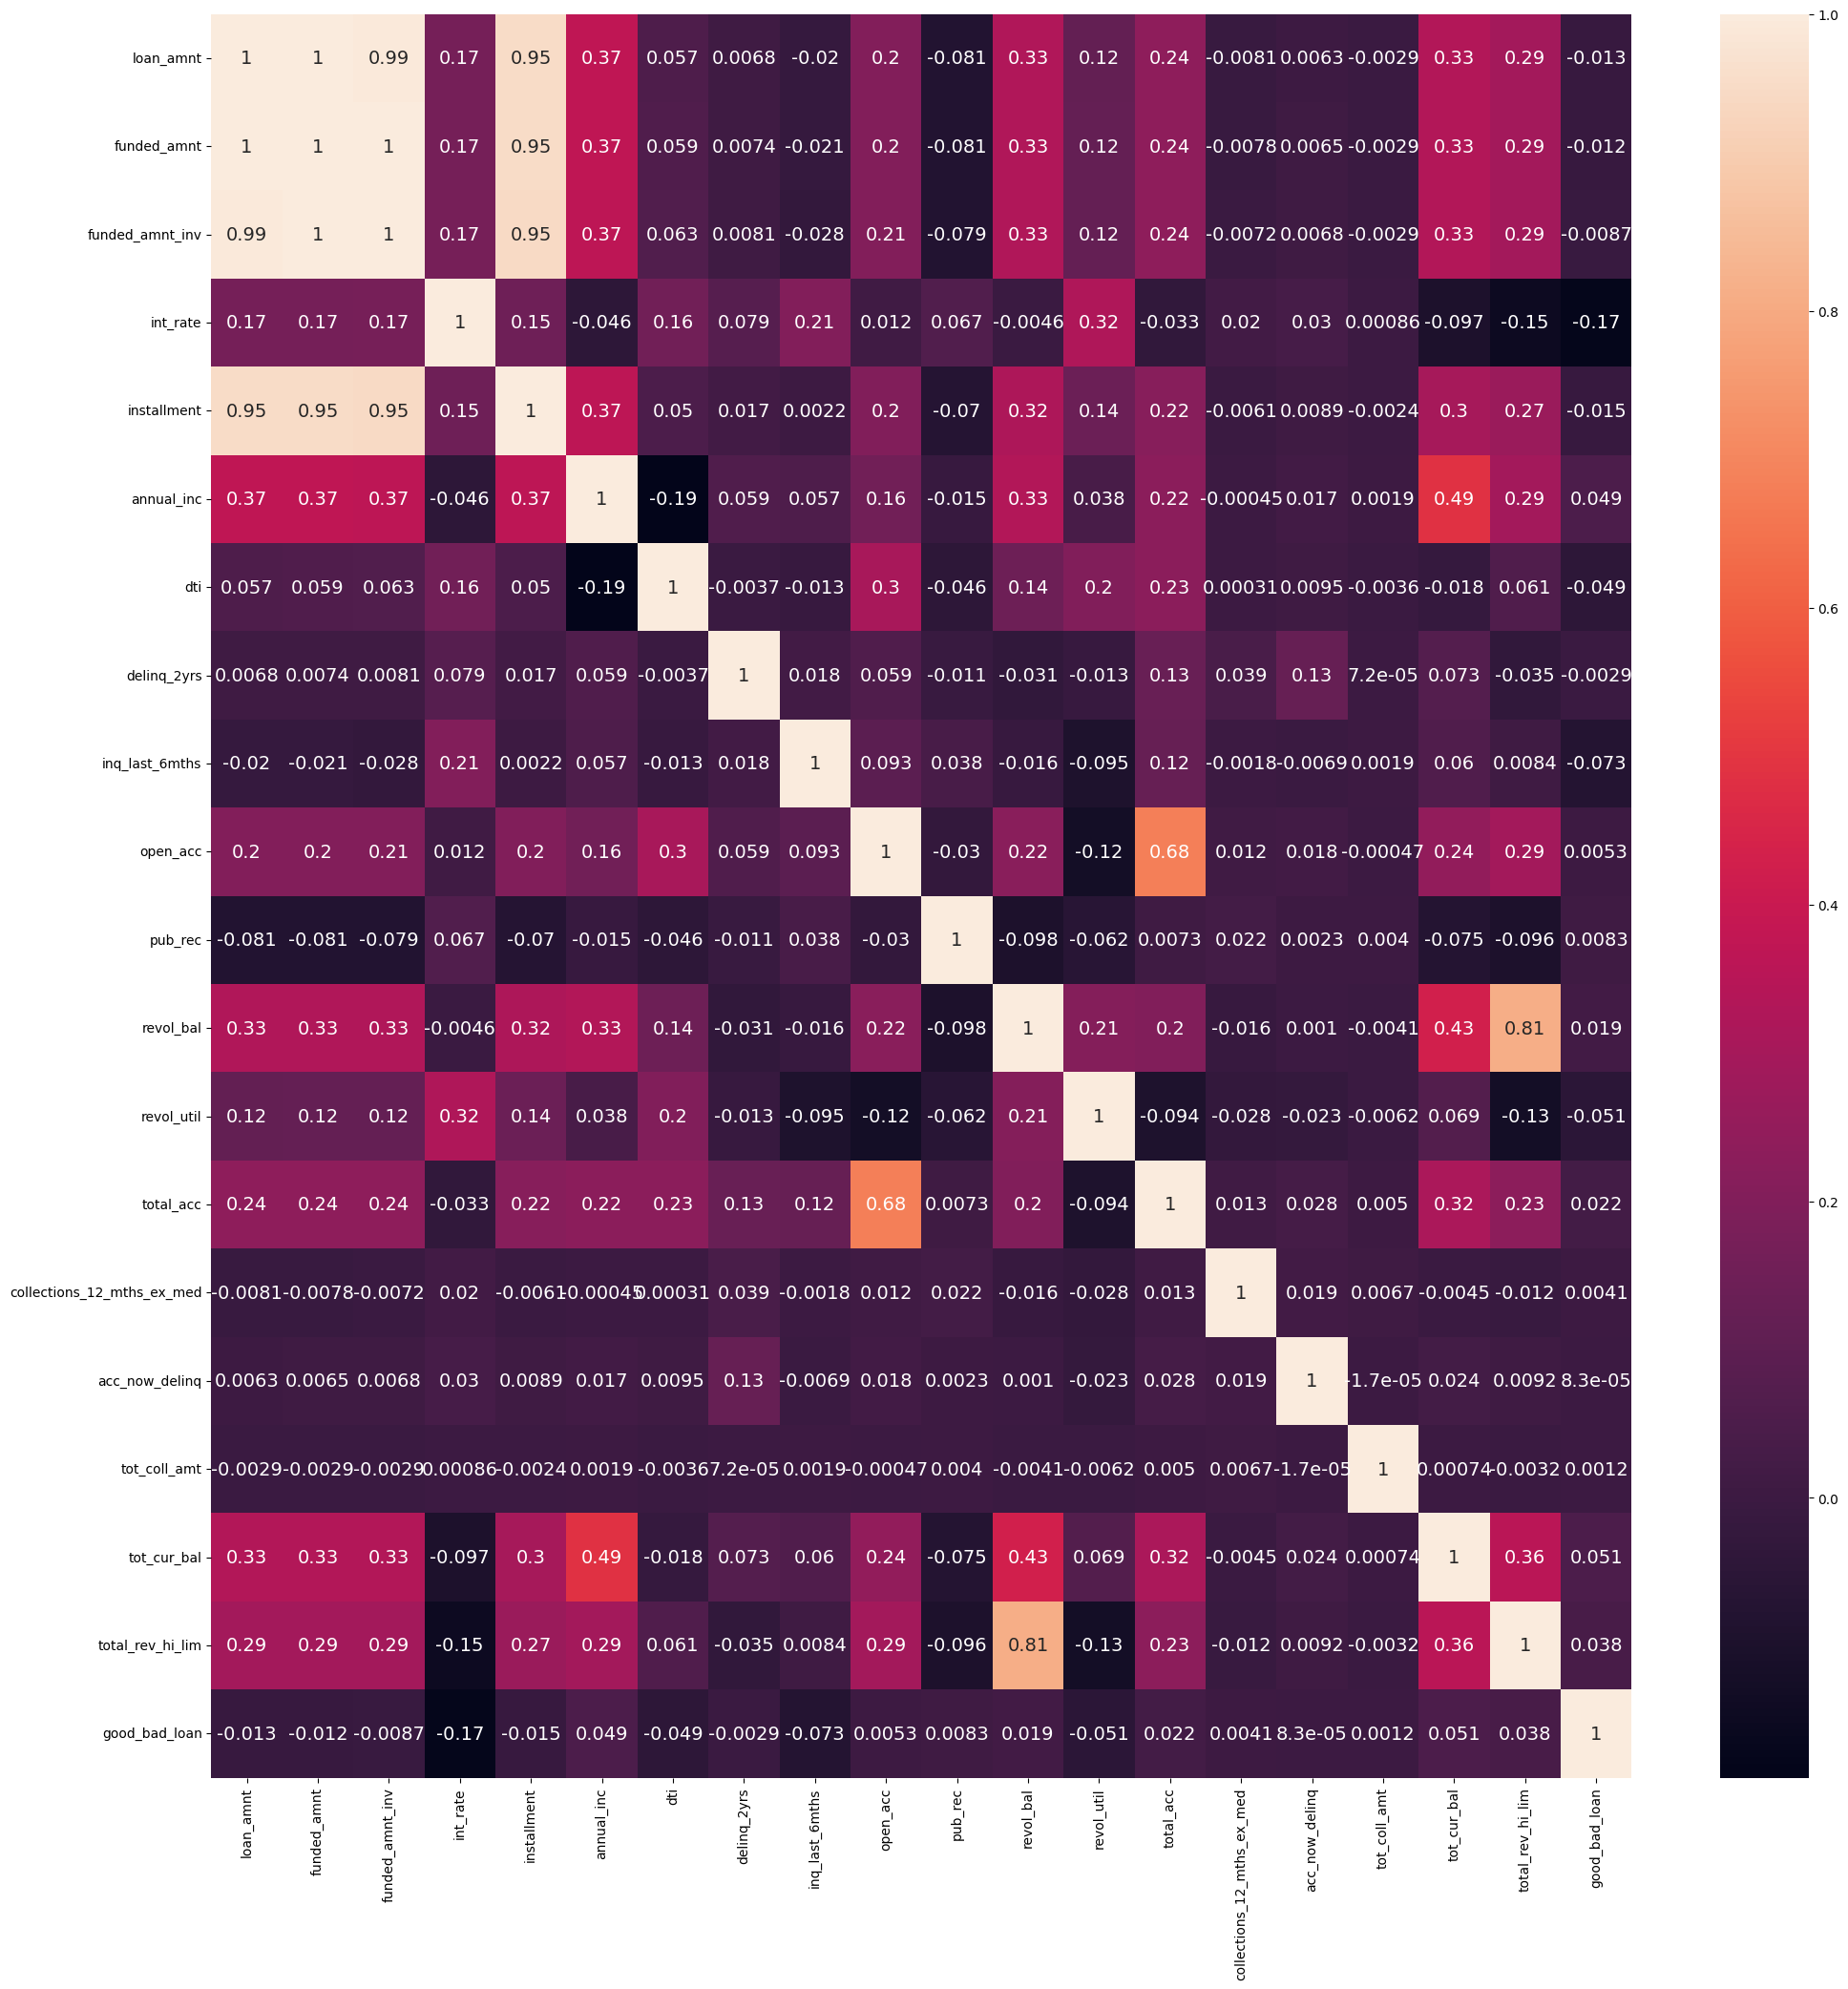

In [20]:
#Check correlation
plt.figure(figsize=(24,24))
sns.heatmap(loan_data.corr(), annot=True, annot_kws={'size':14})

*loan_amnt, funded_amnt, funded_amnt_inv have similar correlation to other columns. So these columns probably has almost similar data

In [21]:
# Check the suspect similar columns
loan_data[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,466285.000000,466285.000000,466285.000000
mean,14317.277577,14291.801044,14222.329888
std,8286.509164,8274.371300,8297.637788
min,500.000000,500.000000,0.000000
25%,8000.000000,8000.000000,8000.000000
50%,12000.000000,12000.000000,12000.000000
75%,20000.000000,20000.000000,19950.000000
max,35000.000000,35000.000000,35000.000000


In [22]:
# based on the output, the data is so similar, and we can remove 2 of them.
loan_data.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace = True)

In [ ]:
#Checking for missing values
loan_data.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
last_credit_pull_d               42
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
total_rev_hi_lim              70276
good_bad_loan               

In [23]:
# retriving the columns which has any null values
loan_data_columns=loan_data.columns[loan_data.isnull().any()].tolist()
loan_data[loan_data_columns].isnull().sum()*100/len(loan_data)

emp_length                     4.505399
annual_inc                     0.000858
delinq_2yrs                    0.006219
earliest_cr_line               0.006219
inq_last_6mths                 0.006219
open_acc                       0.006219
pub_rec                        0.006219
revol_util                     0.072917
total_acc                      0.006219
last_credit_pull_d             0.009007
collections_12_mths_ex_med     0.031097
acc_now_delinq                 0.006219
tot_coll_amt                  15.071469
tot_cur_bal                   15.071469
total_rev_hi_lim              15.071469
dtype: float64

tot_coll_amt, tot_cur_bal, total_rev_hi_lim have the same total missing 15% from all the data. So the three columns will be checked.


*   tot_coll_amt: Total collection amounts ever owed
*   tot_cur_bal: Total current balance of all accounts
*   total_rev_hi_lim: Total revolving high credit/credit limit

In [ ]:
# Check tot_coll_amt, tot_cur_bal, total_rev_hi_lim
total_cols = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

loan_data[total_cols].head(10)

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [ ]:
loan_data[total_cols].sample(10)

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
296893,0.0,33980.0,32900.0
172340,0.0,17406.0,26900.0
420801,0.0,428941.0,39600.0
35944,NaN,NaN,NaN
153701,0.0,143306.0,8800.0
56334,0.0,220991.0,89700.0
149846,0.0,78473.0,33307.0
379424,0.0,157144.0,17700.0
127632,0.0,538803.0,40700.0
94014,265.0,28078.0,14000.0


*as shown in the data above, this column has a similar missing value location

In [ ]:
loan_data[total_cols].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.919135e+02,1.388017e+05,3.037909e+04
std,1.463021e+04,1.521147e+05,3.724713e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.861800e+04,1.350000e+04
50%,0.000000e+00,8.153900e+04,2.280000e+04
75%,0.000000e+00,2.089530e+05,3.790000e+04
max,9.152545e+06,8.000078e+06,9.999999e+06


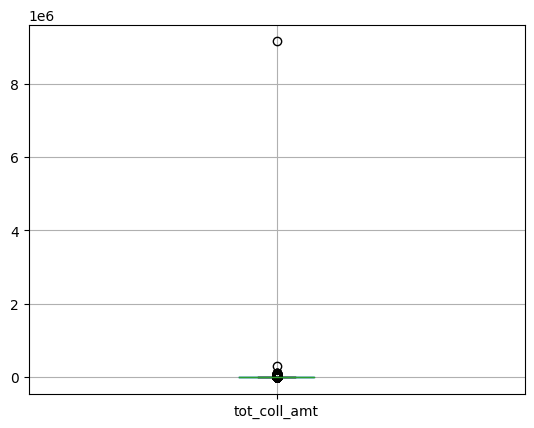

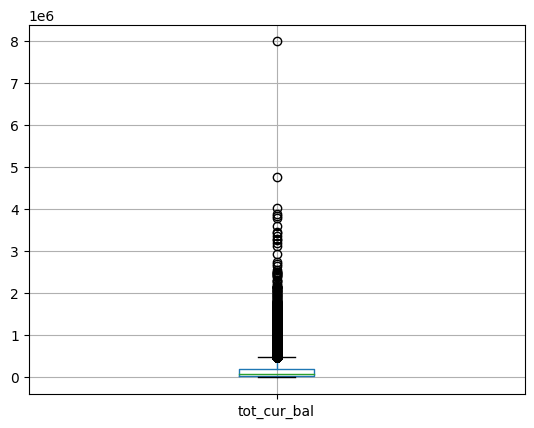

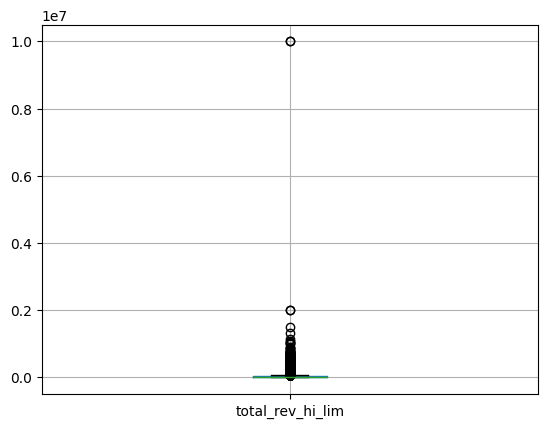

In [ ]:
def tot_cols(x):
    loan_data.boxplot(x)
    plt.show()

for cols in total_cols:
    tot_cols(cols)

Conclusion:

*   75% of tot_coll_amt is 0
*   the data for each row is quite different so it is not possible to fill *   in the missing value with the mean value or other value
*   total missing value 70276 = 15.07% of all data
*   so the rows of the missing value in those columns will be dropped

In [ ]:
# drop all rows that contain missing value
loan_data.dropna(subset = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace = True)

In [ ]:
#reset index
loan_data.reset_index(drop= True, inplace = True)

**Pre-processing Few Continuos Variable (Data Type Transformation)**

The following variables are not possessing appropriate data types and should be modified

In [ ]:
continuous_cols = ['term', 'emp_length', 'earliest_cr_line', 'last_credit_pull_d']
loan_data[continuous_cols]

,term,emp_length,earliest_cr_line,last_credit_pull_d
0,36 months,10+ years,Oct-86,Dec-15
1,36 months,1 year,Jan-07,Jan-16
2,36 months,10+ years,Mar-94,Jan-16
3,36 months,10+ years,Oct-98,Jan-16
4,36 months,2 years,Mar-98,Jan-16
...,...,...,...,...
396004,60 months,4 years,Apr-03,Jan-16
396005,60 months,10+ years,Jun-97,Jan-16
396006,60 months,7 years,Dec-01,Dec-15
396007,36 months,3 years,Feb-03,Apr-15


In [ ]:
# Check the data
loan_data['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          36 months
             ...    
396004     60 months
396005     60 months
396006     60 months
396007     36 months
396008     36 months
Name: term, Length: 396009, dtype: object

In [ ]:
# Convert to numerical datatype and replace months with empty strng
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term']

0         36
1         36
2         36
3         36
4         36
          ..
396004    60
396005    60
396006    60
396007    36
396008    36
Name: term, Length: 396009, dtype: int64

In [ ]:
# Displays unique values of emp_length
loan_data['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '5 years', '6 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [ ]:
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

loan_data['emp_length'] = loan_data['emp_length'].map(emp_map).fillna('0').astype(int)
loan_data['emp_length'].unique()

array([10,  1,  2,  4,  3,  7,  5,  6,  9,  8,  0])

In [ ]:
# # Displays a column
loan_data['earliest_cr_line']

0         Oct-86
1         Jan-07
2         Mar-94
3         Oct-98
4         Mar-98
           ...  
396004    Apr-03
396005    Jun-97
396006    Dec-01
396007    Feb-03
396008    Feb-00
Name: earliest_cr_line, Length: 396009, dtype: object

In [ ]:
# Extracts the date and the time from a string variable that is in a given format
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [ ]:
earliest_date = loan_data['earliest_cr_line_date']

In [ ]:
earliest_date

0        1986-10-01
1        2007-01-01
2        1994-03-01
3        1998-10-01
4        1998-03-01
            ...    
396004   2003-04-01
396005   1997-06-01
396006   2001-12-01
396007   2003-02-01
396008   2000-02-01
Name: earliest_cr_line_date, Length: 396009, dtype: datetime64[ns]

In [ ]:
# Assume we are now in December 2017
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# calculate the difference between two dates in months, turn it to numeric datatype and round it.
# save the result in a new variable.

In [ ]:
# Shows some descriptive statisics for the values of a column
loan_data['mths_since_earliest_cr_line'].describe()

count    396009.000000
mean        238.898512
std          95.101534
min        -612.000000
25%         182.000000
50%         224.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
# display the rows where a variable has negative value
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
628,Oct-68,2068-10-01,-610.0
843,Aug-67,2067-08-01,-596.0
1021,Jul-67,2067-07-01,-595.0
1740,Apr-68,2068-04-01,-604.0
3645,Jan-61,2061-01-01,-517.0
...,...,...,...
393727,Jan-68,2068-01-01,-601.0
393984,Jul-66,2066-07-01,-583.0
394824,Oct-67,2067-10-01,-598.0
395224,Sep-67,2067-09-01,-597.0


In [ ]:
# Change the dtype into string and replace the year 2069 etc into 1969 etc
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line_date'].astype(str)
loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0].str.replace('20','19')

<ipython-input-44-52829bfb0e5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['earliest_cr_line_date'][loan_data['mths_since_earliest_cr_line'] < 0].str.replace('20','19')


In [ ]:
# check one of the data that change from 2068 to 1968
loan_data['earliest_cr_line_date'][628]

'1968-10-01'

In [ ]:
# change dtype into datetime again
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line_date'])
loan_data['earliest_cr_line_date']

0        1986-10-01
1        2007-01-01
2        1994-03-01
3        1998-10-01
4        1998-03-01
            ...    
396004   2003-04-01
396005   1997-06-01
396006   2001-12-01
396007   2003-02-01
396008   2000-02-01
Name: earliest_cr_line_date, Length: 396009, dtype: datetime64[ns]

In [ ]:
# check the data again to see the changes (Assume in Dec 2015)
loan_data['mths_since_earliest_cr_line_date'] = round(pd.to_numeric((pd.to_datetime('2015-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# Shows some descriptive statisics for the values of a column.
loan_data['mths_since_earliest_cr_line_date'].describe()

count    396009.000000
mean        218.040865
std          87.849670
min          49.000000
25%         159.000000
50%         201.000000
75%         262.000000
max         863.000000
Name: mths_since_earliest_cr_line_date, dtype: float64

In [ ]:
#drop column earliest_cr_line_date, mths_since_earliest_cr_line,
# and earliest_cr_line as we don't use it anymore
loan_data.drop(columns = ['earliest_cr_line_date' ,'mths_since_earliest_cr_line',
                          'earliest_cr_line'], inplace = True)

In [ ]:
loan_data['last_credit_pull_d']

0         Dec-15
1         Jan-16
2         Jan-16
3         Jan-16
4         Jan-16
           ...  
396004    Jan-16
396005    Jan-16
396006    Dec-15
396007    Apr-15
396008    Jan-16
Name: last_credit_pull_d, Length: 396009, dtype: object

In [ ]:
# Assume now in December 2017
# Extracts the date and the time from a string variable that is in a given format. and fill NaN data with max date
loan_data['last_credit_pull_d'] = pd.to_datetime(loan_data['last_credit_pull_d'], format = '%b-%y').fillna(pd.to_datetime("2016-01-01"))

# calculate the difference between two dates in months, turn it to numeric datatype and round it.
loan_data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['last_credit_pull_d']) / np.timedelta64(1, 'M')))

# Shows some descriptive statisics for the values of a column.
loan_data['mths_since_last_credit_pull_d'].describe()

count    396009.000000
mean         25.105753
std           5.213815
min          23.000000
25%          23.000000
50%          23.000000
75%          23.000000
max          64.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [ ]:
#drop column last_credit_pull_d as we don't use it anymore
loan_data.drop(columns = ['last_credit_pull_d'], inplace = True)

In [ ]:
#Checking for missing values
loan_data.isnull().sum()

loan_amnt                             0
term                                  0
int_rate                              0
installment                           0
grade                                 0
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
purpose                               0
addr_state                            0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                          219
total_acc                             0
initial_list_status                   0
collections_12_mths_ex_med            0
acc_now_delinq                        0
tot_coll_amt                          0
tot_cur_bal                           0
total_rev_hi_lim                      0


In [ ]:
#drop column revol_util as we don't use it anymore
loan_data.drop(columns = ['revol_util'], inplace = True)

In [ ]:
#reset index
loan_data.reset_index(drop= True, inplace = True)

In [ ]:
#Checking for missing values
missing_value = loan_data.isnull().sum()
missing_value[missing_value>0]

Series([], dtype: int64)

**Explore Data**

In [ ]:
def risk_percentage(x):
    ratio = (loan_data.groupby(x)['good_bad_loan'] # group by
         .value_counts(normalize=True) # calculate the ratio
         .mul(100) # multiply by 100 to be percent
         .rename('risky (%)') # rename column as percent
         .reset_index())

    sns.lineplot(data=ratio[ratio['good_bad_loan'] == 0], x=x, y='risky (%)')
    plt.title(x)
    plt.show()

In [ ]:
print(loan_data.nunique()[loan_data.nunique() < 12].sort_values().index)


Index(['term', 'initial_list_status', 'good_bad_loan', 'verification_status',
       'home_ownership', 'acc_now_delinq', 'grade', 'inq_last_6mths',
       'collections_12_mths_ex_med', 'emp_length'],
      dtype='object')


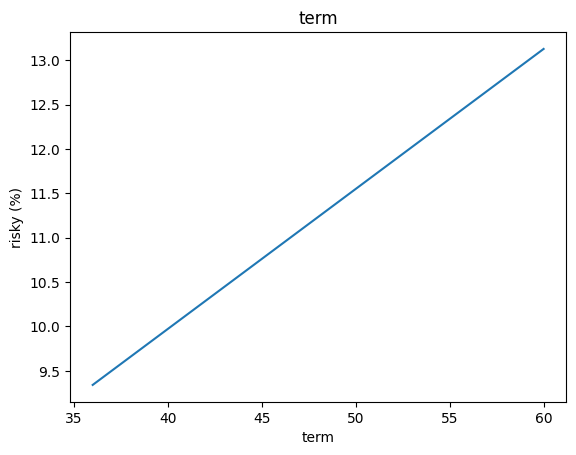

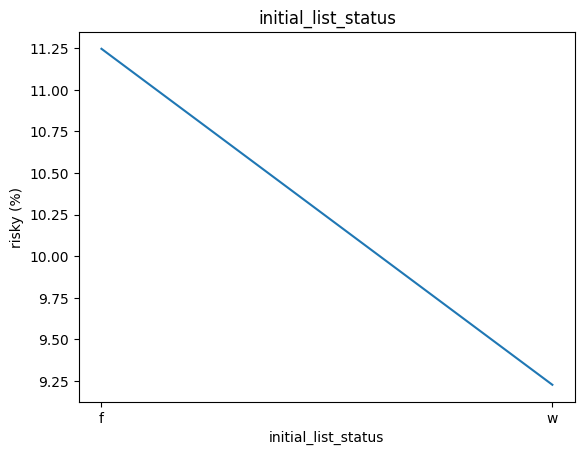

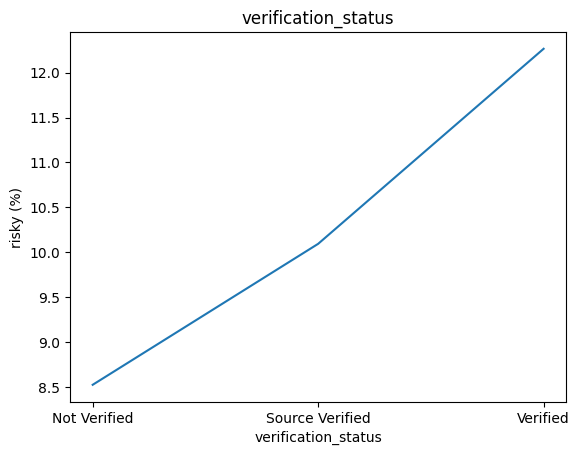

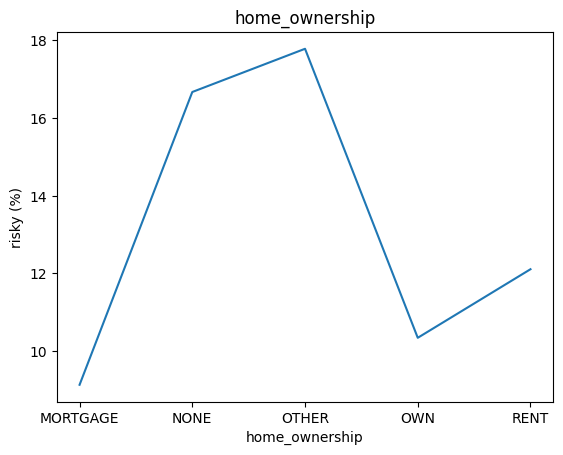

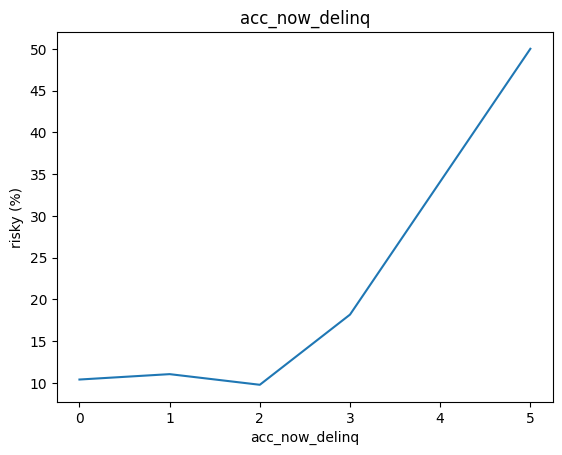

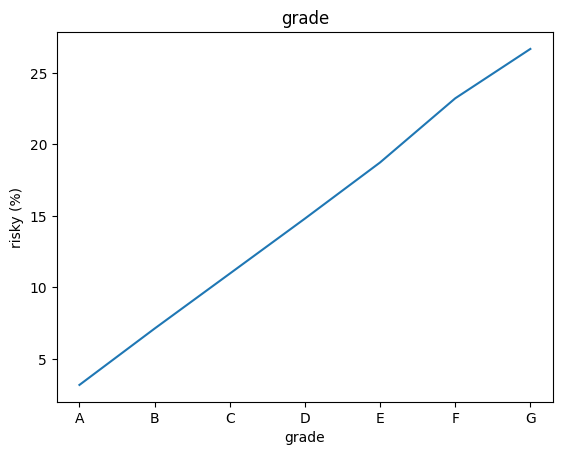

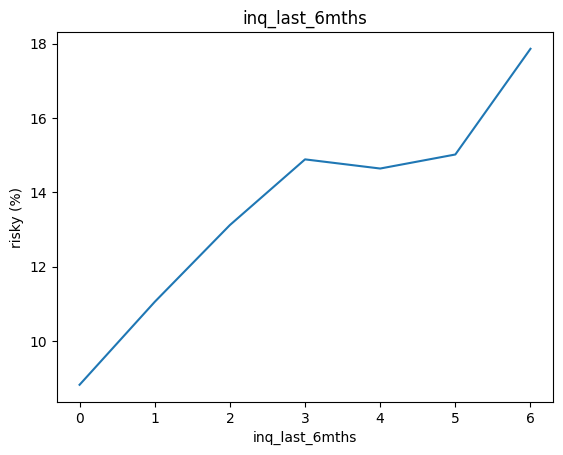

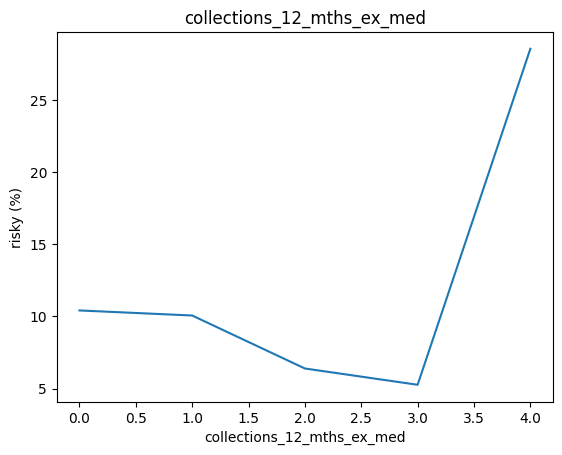

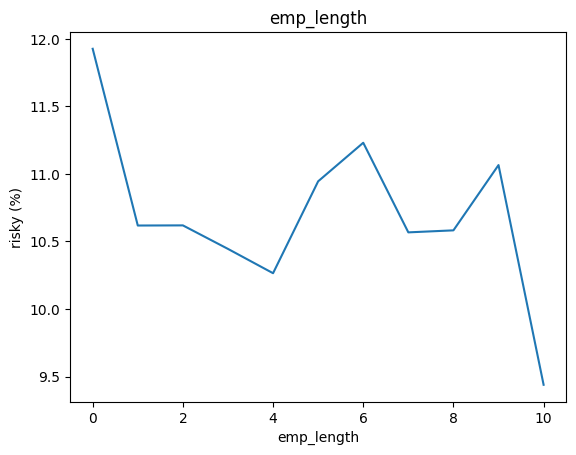

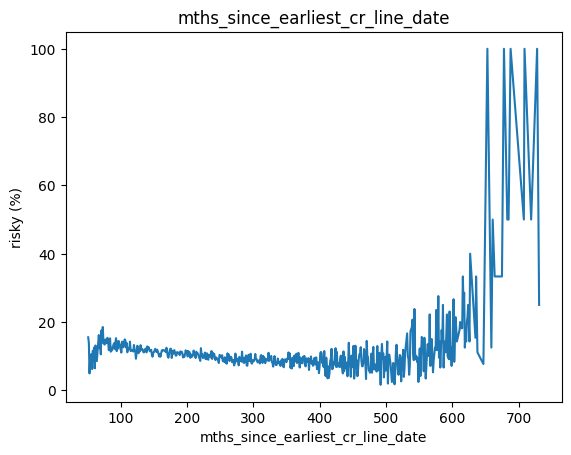

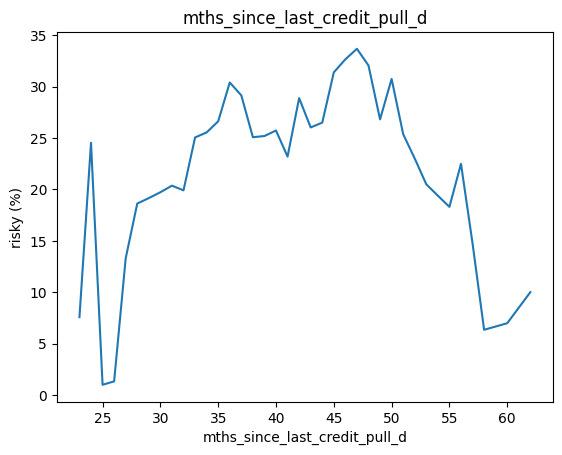

In [ ]:
#unique columns and months date column
unq_cols = ['term', 'initial_list_status', 'verification_status',
       'home_ownership', 'acc_now_delinq', 'grade', 'inq_last_6mths',
       'collections_12_mths_ex_med', 'emp_length', 'mths_since_earliest_cr_line_date', 'mths_since_last_credit_pull_d']
for cols in unq_cols:
    risk_percentage(cols)

<ipython-input-60-bcd01c826716>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data.corr(), annot=True, annot_kws={'size':14})


<Axes: >

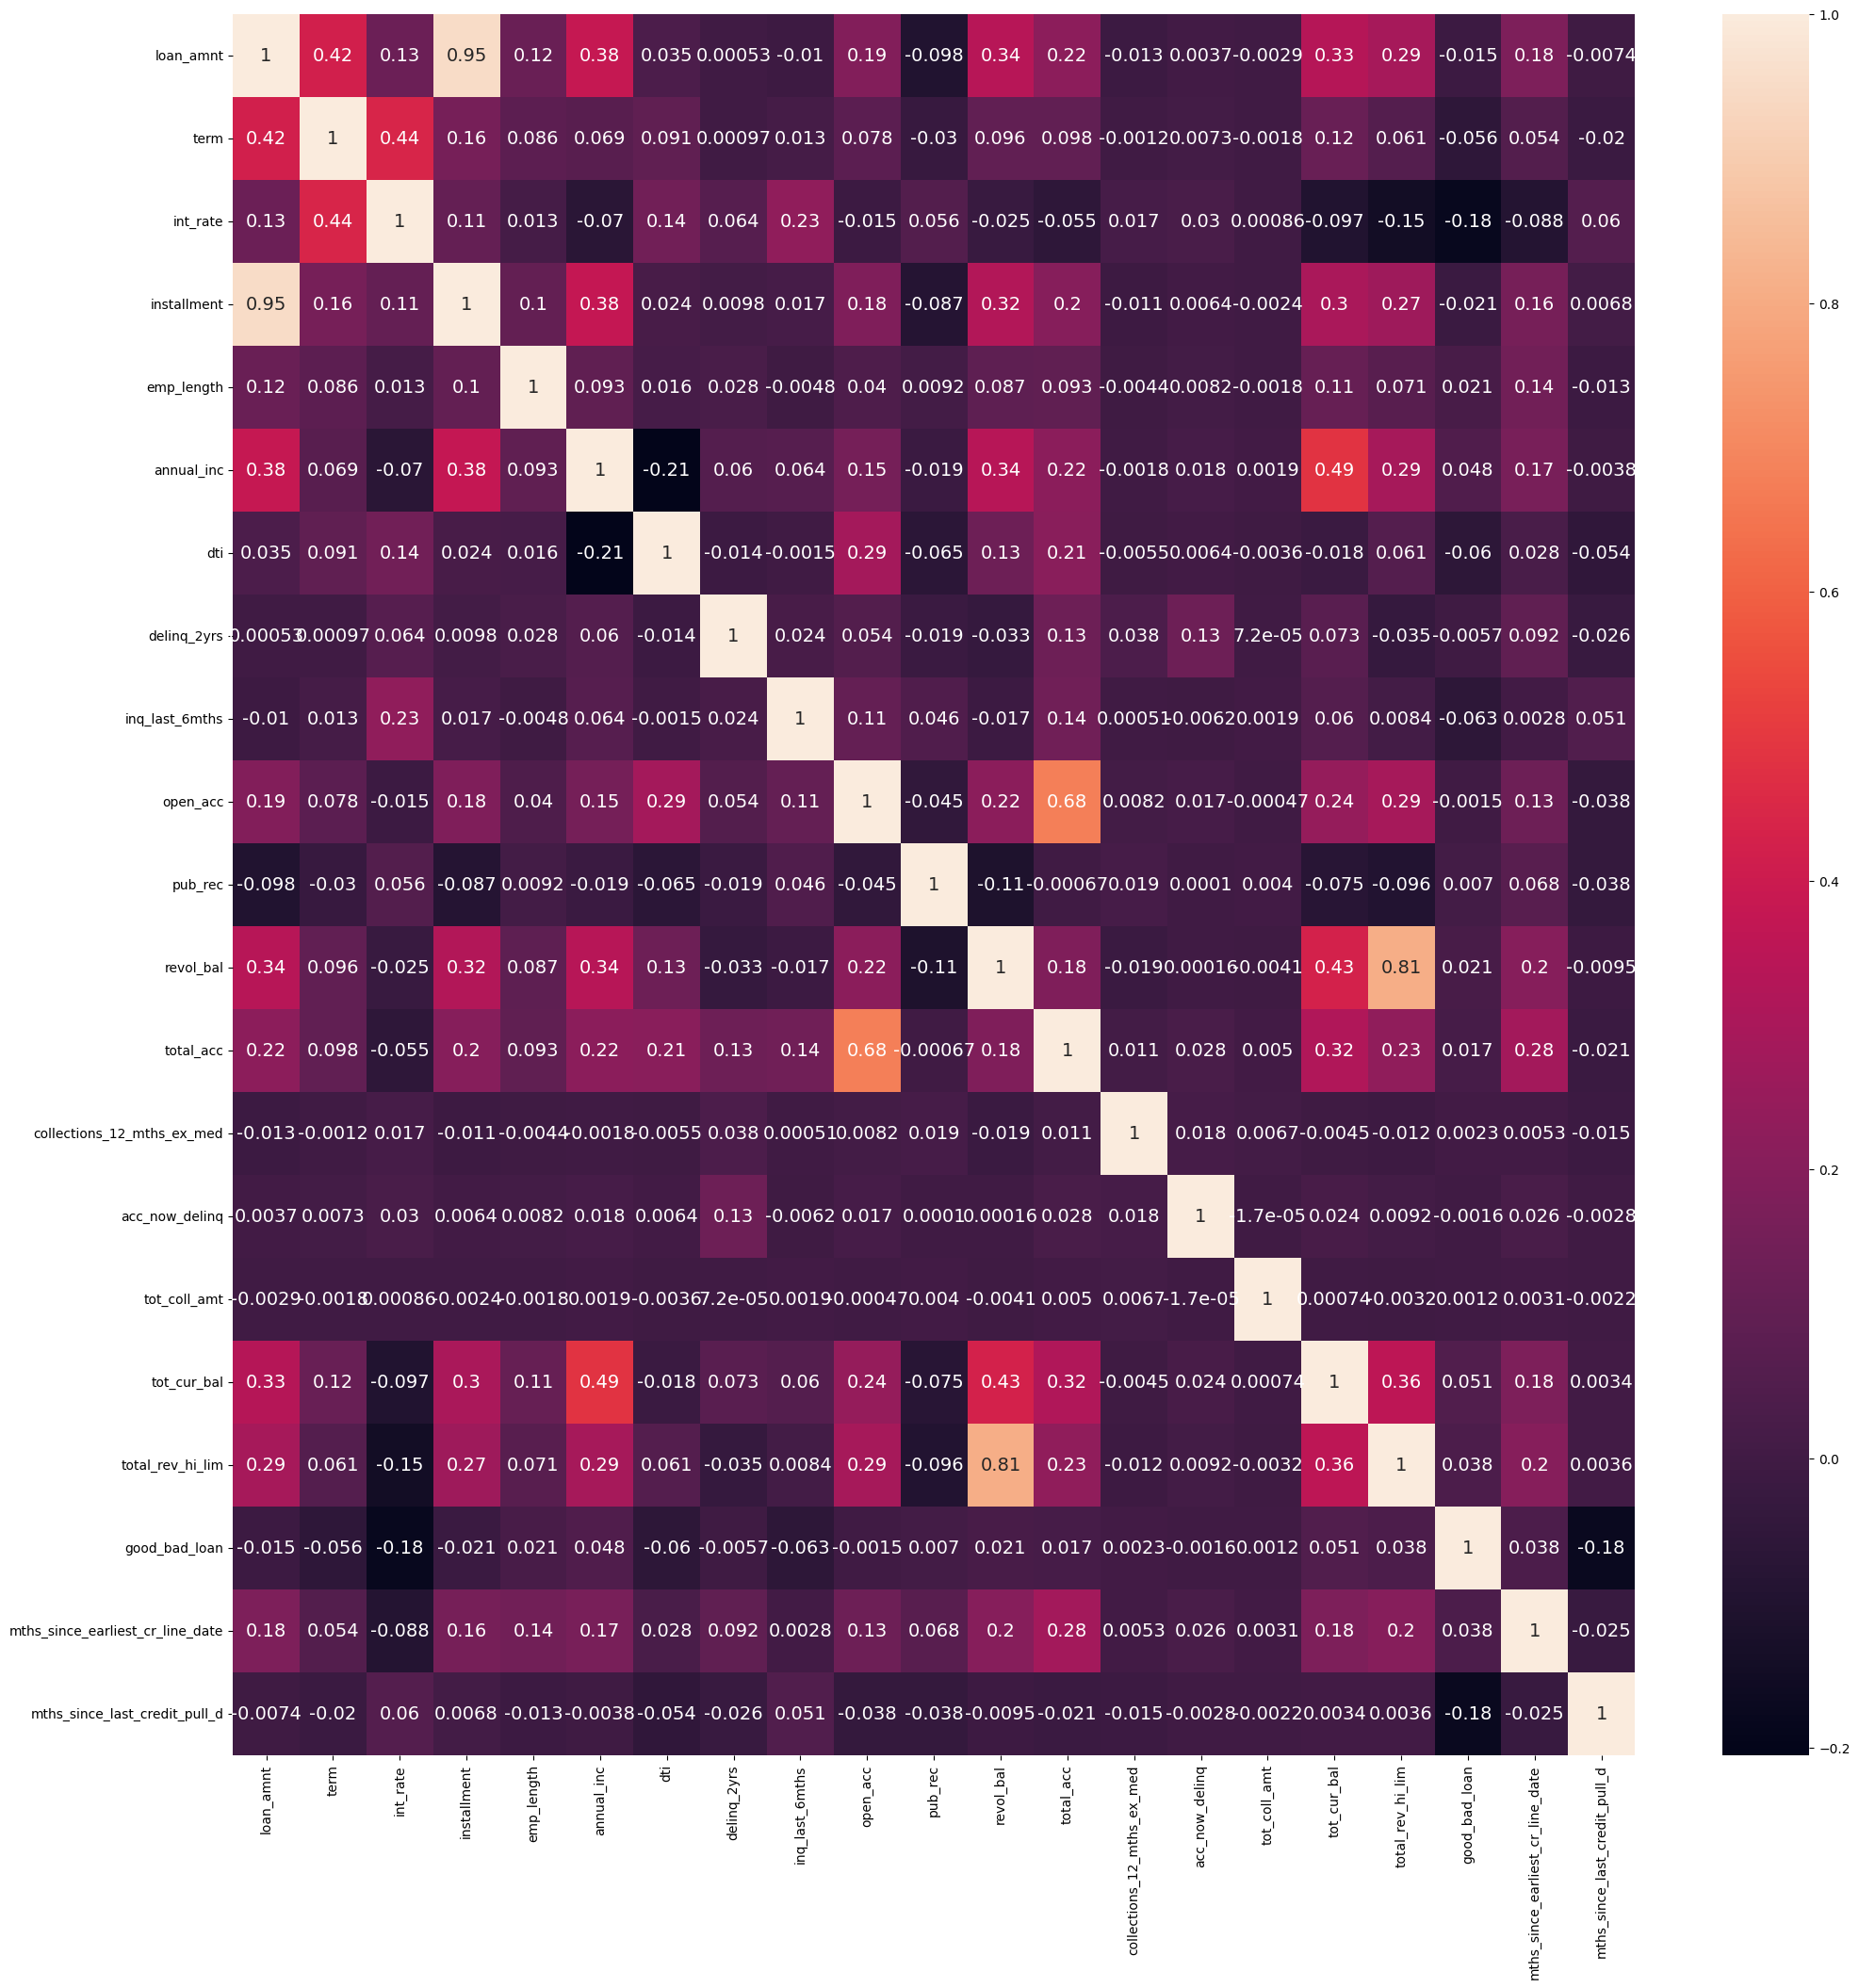

In [ ]:
#Check correlation
plt.figure(figsize=(24,24))
sns.heatmap(loan_data.corr(), annot=True, annot_kws={'size':14})

In [ ]:
# Convert categorical columns with One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
cat_cols = [col for col in loan_data.select_dtypes(include='object').columns.tolist()]
onehot_cols = pd.get_dummies(loan_data[cat_cols], drop_first=True)

In [ ]:
onehot_cols

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396004,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
396005,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
396006,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396007,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = [col for col in loan_data.columns.tolist() if col not in cat_cols + ['good_bad_loan']]
ss = StandardScaler()
std_cols = pd.DataFrame(ss.fit_transform(loan_data[num_cols]), columns=num_cols)

In [ ]:
std_cols

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line_date,mths_since_last_credit_pull_d
0,1.482170,-0.628523,-0.699230,1.805874,1.103741,-0.348864,0.652631,-0.369424,-0.747992,0.508914,-0.332097,0.958438,0.127046,-0.09078,-0.063209,-0.013118,-0.157564,0.792570,1.502104,-0.212082
1,-0.600856,-0.628523,-0.016330,-0.459863,-1.286462,-0.879727,0.938245,-0.369424,-0.747992,0.111068,-0.332097,-0.410679,0.213340,-0.09078,-0.063209,-0.013118,-0.819637,-0.410209,-1.263989,-0.403880
2,-0.329942,-0.628523,-1.697314,-0.315014,1.103741,0.566416,-0.466979,-0.369424,0.217036,0.111068,-0.332097,-0.162317,-0.304423,-0.09078,-0.063209,-0.013118,0.847022,0.824787,0.489008,-0.403880
3,-0.329942,-0.628523,-0.119108,-0.155232,1.103741,-0.623449,-0.100122,-0.369424,-0.747992,-0.883548,3.345057,-0.525047,0.558515,-0.09078,-0.063209,1.038543,-0.823043,-0.598143,-0.137062,-0.403880
4,0.031276,-0.628523,-1.176575,0.127411,-1.020884,-0.202420,-0.154707,-0.369424,-0.747992,-0.684625,-0.332097,-0.245264,0.299634,-0.09078,-0.063209,0.090367,0.878879,-0.402155,-0.057381,-0.403880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396004,0.440657,1.591031,0.095583,-0.051692,-0.489728,0.657944,0.269273,-0.369424,1.182065,1.304607,-0.332097,0.317120,0.903690,-0.09078,-0.063209,-0.013118,1.026834,-0.012862,-0.751750,-0.403880
396005,0.874119,1.591031,1.351753,0.563066,1.103741,0.072165,0.091557,-0.369424,4.077152,1.304607,1.506480,0.079789,0.385928,-0.09078,-0.063209,-0.013118,0.545828,0.242191,0.045067,-0.403880
396006,0.717591,1.591031,0.671137,0.283459,0.307007,-0.513615,1.005524,-0.369424,1.182065,1.304607,-0.332097,-0.471755,1.507747,-0.09078,-0.063209,-0.013118,-0.428649,-0.463904,-0.569620,-0.212082
396007,-1.534004,-0.628523,-1.404969,-1.569718,-0.755306,0.163693,-1.566277,3.226411,0.217036,1.901376,-0.332097,-0.246553,0.127046,-0.09078,-0.063209,-0.013118,2.976760,0.610005,-0.728983,1.322305


get the final dataa

In [ ]:
# combining column
final_data = pd.concat([onehot_cols, std_cols, loan_data[['good_bad_loan']]], axis=1)
final_data.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line_date,mths_since_last_credit_pull_d,good_bad_loan
0,1,0,0,0,0,0,0,0,0,1,...,0.958438,0.127046,-0.09078,-0.063209,-0.013118,-0.157564,0.792570,1.502104,-0.212082,1
1,0,1,0,0,0,0,0,0,0,0,...,-0.410679,0.213340,-0.09078,-0.063209,-0.013118,-0.819637,-0.410209,-1.263989,-0.403880,1
2,0,0,0,0,0,0,1,0,0,0,...,-0.162317,-0.304423,-0.09078,-0.063209,-0.013118,0.847022,0.824787,0.489008,-0.403880,1
3,1,0,0,0,0,0,0,0,0,0,...,-0.525047,0.558515,-0.09078,-0.063209,1.038543,-0.823043,-0.598143,-0.137062,-0.403880,1
4,0,0,0,0,0,0,1,0,0,0,...,-0.245264,0.299634,-0.09078,-0.063209,0.090367,0.878879,-0.402155,-0.057381,-0.403880,1


In [ ]:
# separate dependant (y) and independant (X) variable
X = final_data.drop('good_bad_loan', axis = 1)
y = final_data['good_bad_loan']

In [ ]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,stratify=y)

In [ ]:
X_train.shape, X_test.shape

((316807, 95), (79202, 95))

Checking for Class Imbalance in Final Dataset

<Axes: title={'center': 'Good (1) vs Bad (0) Loans Balance'}, xlabel='None'>

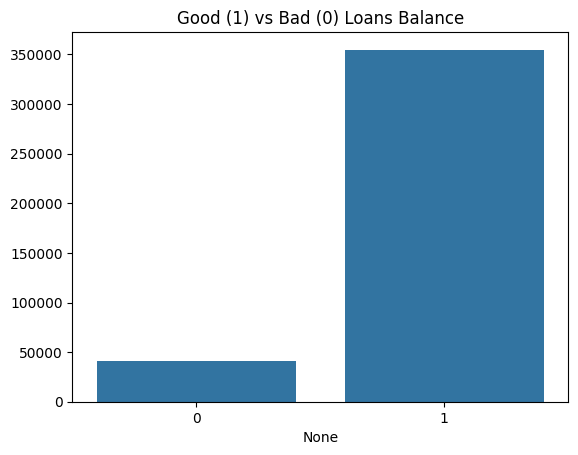

In [ ]:
#check if class labels are balanced
plt.title('Good (1) vs Bad (0) Loans Balance')
sns.barplot(x=final_data.good_bad_loan.value_counts().index,y=final_data.good_bad_loan.value_counts().values)

In [ ]:
#checking  imbalance for training dataset
y_train.value_counts()

1    283815
0     32992
Name: good_bad_loan, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#check value counts before and after oversampling
print('Before OverSampling:\n{}'.format(y_train.value_counts()))
print('\nAfter OverSampling:\n{}'.format(y_train_ros.value_counts()))

Before OverSampling:
1    283815
0     32992
Name: good_bad_loan, dtype: int64

After OverSampling:
1    283815
0    283815
Name: good_bad_loan, dtype: int64


In [ ]:
# Import Library
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, make_scorer, f1_score, accuracy_score

In this case, we  build 10 models to get which model have the best performance

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [ ]:
# Training
LR_ros= LogisticRegression(max_iter=600)
LR_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_LR_ros = LR_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_LR_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1881    0.6581    0.2925      8357
   good loan     0.9437    0.6683    0.7825     71591

    accuracy                         0.6673     79948
   macro avg     0.5659    0.6632    0.5375     79948
weighted avg     0.8647    0.6673    0.7313     79948



In [ ]:
# building model
rf_ros = RandomForestClassifier(max_depth=10, n_estimators=20)
rf_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_rf_ros = rf_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_rf_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1876    0.6719    0.2933      8357
   good loan     0.9452    0.6603    0.7775     71591

    accuracy                         0.6615     79948
   macro avg     0.5664    0.6661    0.5354     79948
weighted avg     0.8660    0.6615    0.7269     79948



In [ ]:
#building model
dt_ros = DecisionTreeClassifier(max_depth = 10)
dt_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_dt_ros = dt_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_dt_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1974    0.6519    0.3031      8357
   good loan     0.9444    0.6907    0.7979     71591

    accuracy                         0.6866     79948
   macro avg     0.5709    0.6713    0.5505     79948
weighted avg     0.8664    0.6866    0.7462     79948



In [ ]:
#building model
knn_ros = KNeighborsClassifier(n_neighbors=20)
knn_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_knn_ros = knn_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_knn_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1508    0.6024    0.2412      8248
   good loan     0.9291    0.6057    0.7333     70954

    accuracy                         0.6054     79202
   macro avg     0.5400    0.6041    0.4873     79202
weighted avg     0.8481    0.6054    0.6821     79202



In [ ]:
#building model
xgb_ros = XGBClassifier(max_depth=5)
xgb_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_xgb_ros = xgb_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_xgb_ros, digits=4, target_names = target_names))


Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.2101    0.6509    0.3176      8248
   good loan     0.9463    0.7155    0.8149     70954

    accuracy                         0.7087     79202
   macro avg     0.5782    0.6832    0.5662     79202
weighted avg     0.8697    0.7087    0.7631     79202



In [ ]:
# #building model
lgbm_ros =  LGBMClassifier(num_iterations = 600)
lgbm_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_lgbm_ros = lgbm_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_lgbm_ros, digits=4, target_names = target_names))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 283815, number of negative: 283815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.137689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2846
[LightGBM] [Info] Number of data points in the train set: 567630, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.2229    0.6182    0.3277      8248
   good loan     0.9441    0.7495    0.8356     70954

    accuracy                         0.7358     79202
   macro avg     0.5835    0.6839    0.5817     79202
weighted avg     0.8690    0.7358    0.7827     79202



In [ ]:
#building model
adb_ros = AdaBoostClassifier(n_estimators = 100)
adb_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_adb_ros = adb_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_adb_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1963    0.6678    0.3034      8248
   good loan     0.9464    0.6821    0.7928     70954

    accuracy                         0.6806     79202
   macro avg     0.5713    0.6749    0.5481     79202
weighted avg     0.8683    0.6806    0.7418     79202



In [ ]:
#building model
naiveBayes_ros = GaussianNB()
naiveBayes_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_naiveBayes_ros = naiveBayes_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_naiveBayes_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1459    0.6976    0.2414      8248
   good loan     0.9373    0.5254    0.6734     70954

    accuracy                         0.5434     79202
   macro avg     0.5416    0.6115    0.4574     79202
weighted avg     0.8549    0.5434    0.6284     79202



In [ ]:
#building model
QDA_ros = QuadraticDiscriminantAnalysis()
QDA_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_QDA_ros = QDA_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_QDA_ros, digits=4, target_names = target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1044    0.9901    0.1889      8248
   good loan     0.9186    0.0130    0.0257     70954

    accuracy                         0.1148     79202
   macro avg     0.5115    0.5015    0.1073     79202
weighted avg     0.8338    0.1148    0.0427     79202



In [ ]:
#building model
MLPC_ros = MLPClassifier(alpha=1, max_iter=1000, random_state=42)
MLPC_ros.fit(X_train_ros, y_train_ros)

#predicting
y_pred_MLPC_ros = MLPC_ros.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_MLPC_ros, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.1980    0.6214    0.3003      8248
   good loan     0.9414    0.7075    0.8078     70954

    accuracy                         0.6985     79202
   macro avg     0.5697    0.6644    0.5541     79202
weighted avg     0.8640    0.6985    0.7550     79202



# Conclusion
The best average accuracy result among all the models above is using the LGBM Classifier with an average accuracy value of 73.58% (bad loan recall = 61.82% and good loan recall = 74.95%). Although this accuracy value is still not high, this value is already quite high because of the imbalanced dataset. Recall is number of correctly predicted “positives” divided by the total number of “positives”. That means this model correctly identified 61.82% of the total bad loans and correctly identified 74.95% of the total good loans.


